# Importando as bibliotecas necessárias
Importando as bibliotecas necessárias, incluindo pandas, matplotlib, seaborn e numpy.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

# Carregar o Dataset

O trecho de código realiza uma análise exploratória inicial no dataset `carros_usados.csv` usando a biblioteca Pandas. As seguintes etapas são executadas:

1. **Carregamento do Dataset:**  
   - O arquivo CSV é lido e armazenado no DataFrame `df`.

2. **Dimensão do Dataset:**  
   - `df.shape` retorna o número total de linhas (registros) e colunas (variáveis), exibindo essa informação no console.

3. **Verificação de Valores Nulos:**  
   - `df.isnull().sum()` contabiliza a quantidade de valores nulos por coluna, auxiliando na identificação de dados ausentes.

4. **Tipos de Dados:**  
   - `df.dtypes` exibe os tipos de dados de cada coluna, facilitando a análise e possíveis conversões de tipos.

5. **Visualização das Primeiras Linhas:**  
   - `df.head()` apresenta as cinco primeiras linhas do dataset para uma inspeção inicial dos dados.


In [ ]:
df = pd.read_csv('carros_usados.csv')

num_linhas, num_colunas = df.shape
print(f"Número total de registros (linhas): {num_linhas}")
print(f"Número total de variáveis (colunas): {num_colunas}")
print("\n")

print("Valores nulos:")
print(df.isnull().sum())
print("\n")

print("Tipos de dados:")
print(df.dtypes)
print("\n")

df.head()

# 1. Vendas e Estoques

# Média de Dias no Estacionamento Antes da Venda  

Este trecho de código calcula o tempo médio (em dias) que os veículos permanecem no lote antes de serem vendidos. A média é obtida a partir da coluna `lot.sale.days` do DataFrame.  

O resultado é formatado para duas casas decimais e exibido no console, fornecendo uma visão geral do tempo médio de permanência dos veículos antes da venda.


In [ ]:
average_lot_sale_days = df['lot.sale.days'].mean()
print(f"Número médio de dias que os veículos ficam no estacionamento antes de serem vendidos: {average_lot_sale_days:.2f} dias")

# Análise do Tempo Médio de Venda por Tipo de Veículo  

Este código analisa o tempo médio que cada tipo de veículo passa no lote antes de ser vendido e identifica o tipo de veículo com o menor tempo médio de venda. Além disso, ele gera uma visualização gráfica para facilitar a interpretação dos dados.

### Objetivo:
Esse código fornece insights sobre quais tipos de veículos são vendidos mais rapidamente.


In [ ]:
vehicle_type_min_sale_time = df.groupby('vehicle.type')['lot.sale.days'].mean().idxmin()
min_sale_time = df.groupby('vehicle.type')['lot.sale.days'].mean().min()

print(f"Vehicle type with the minimum average sale time: {vehicle_type_min_sale_time} with {min_sale_time:.2f} days")

plt.figure(figsize=(10, 6))
sns.barplot(x='vehicle.type', y='lot.sale.days', data=df, estimator=np.mean, ci=None)
plt.title('Tempo médio de venda por tipo de veículo')
plt.xlabel('Tipo de veículo')
plt.ylabel('Tempo médio de venda (dias)')
plt.xticks(rotation=45)
plt.show()

# Análise da Influência da Quilometragem no Tempo de Venda  

Este código investiga a relação entre a quilometragem dos veículos e o tempo que eles permanecem no lote antes de serem vendidos. Ele gera um gráfico de dispersão e calcula a correlação entre essas duas variáveis.

### Objetivo:
Este código ajuda a entender se veículos com quilometragem maior tendem a demorar mais ou menos para serem vendidos.  
- Se a correlação for **positiva**, significa que veículos com mais quilômetros rodados demoram mais para serem vendidos.  
- Se for **negativa**, indica que veículos com maior quilometragem são vendidos mais rapidamente.  
- Se for **próxima de zero**, sugere que não há uma relação clara entre as duas variáveis.


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='lot.sale.days', data=df)
plt.title('Influência da quilometragem no tempo de venda')
plt.xlabel('Quilometragem')
plt.ylabel('Tempo de venda (dias)')
plt.show()

correlation = df['mileage'].corr(df['lot.sale.days'])
print(f"Correlation between mileage and lot sale days: {correlation:.2f}")

# Correlação Entre Idade do Veículo e Custo Total  

Este código investiga a relação entre a idade do veículo e seu custo total, gerando um gráfico de dispersão e calculando o coeficiente de correlação entre essas variáveis.

### Objetivo:
Este código busca entender se veículos mais antigos tendem a ter um custo total maior ou menor.  
- Se a correlação for **negativa**, sugere que veículos mais velhos têm um custo total menor.  
- Se for **positiva**, indica que veículos mais antigos tendem a ter um custo total mais alto.  
- Se for **próxima de zero**, significa que não há uma relação clara entre a idade do veículo e seu custo total.  

O gráfico de dispersão ajuda a visualizar melhor essa relação.


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vehicle.age', y='total.cost', data=df)
plt.title('Correlação entre a idade do veículo e o custo total')
plt.xlabel('Idade do Veículo')
plt.ylabel('Custo Total')
plt.show()

correlation_age_cost = df['vehicle.age'].corr(df['total.cost'])
print(f"Correlação entre idade do veículo e custo total: {correlation_age_cost:.2f}")

# 2. Preço e Custos

# Preço Médio dos Veículos Vendidos por Estado  

Este código calcula o preço médio dos veículos vendidos para cada estado (`state`) e exibe os resultados em ordem decrescente. Além disso, ele gera um gráfico de barras para visualizar melhor a variação dos preços médios entre os estados.

O objetivo desse código é identificar se há variações significativas nos preços médios dos veículos vendidos entre diferentes estados.  


In [ ]:
avg_price_by_state = df.groupby('state')['total.cost'].mean().reset_index()

avg_price_by_state = avg_price_by_state.sort_values(by='total.cost', ascending=False)

print(avg_price_by_state)

plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='total.cost', data=avg_price_by_state, palette='viridis')
plt.title('Preço Médio dos Veículos Vendidos por Estado')
plt.xlabel('Estado')
plt.ylabel('Preço Médio (USD)')
plt.xticks(rotation=45)
plt.show()

# Comparação de Preço Médio: Veículos Importados vs. Domésticos  

Este código analisa se veículos importados (`imported`) são, em média, mais caros do que veículos domésticos (`domestic`). Para isso, ele calcula e compara os preços médios dos veículos em cada categoria. Além disso, um gráfico de barras é gerado para visualizar melhor a diferença de preços.

Se o preço médio dos veículos importados for maior que o dos domésticos, isso indica que, em média, os veículos importados são mais caros. Caso contrário, os veículos domésticos têm um preço médio maior.


In [ ]:
avg_price_by_category = df.groupby('domestic.import')['total.cost'].mean().reset_index()

print(avg_price_by_category)

plt.figure(figsize=(8, 5))
sns.barplot(x='domestic.import', y='total.cost', data=avg_price_by_category, palette='Blues')
plt.title('Comparação do Preço Médio: Veículos Domésticos vs. Importados')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Preço Médio (USD)')
plt.show()

# Diferença de Preço entre Cores de Veículos  

Este código analisa se há diferenças significativas no preço total (`total.cost`) dos veículos com base na cor (`color.set`). Para isso, ele gera um boxplot para visualizar melhor a distribuição dos preços para cada cor.

O boxplot permite visualizar a mediana, quartis e possíveis outliers dos preços para cada cor, proporcionando uma visão mais detalhada das diferenças de preço entre as cores dos veículos.

In [ ]:
avg_price_by_color = df.groupby('color.set')['total.cost'].mean().reset_index()

avg_price_by_color = avg_price_by_color.sort_values(by='total.cost', ascending=False)

print("Preço médio dos veículos por cor:")
print(avg_price_by_color)

plt.figure(figsize=(12, 6))
sns.boxplot(x='color.set', y='total.cost', data=df, color='skyblue')
plt.title('Preço Médio dos Veículos por Cor')
plt.xlabel('Cor do Veículo')
plt.ylabel('Preço Médio (USD)')
plt.xticks(rotation=45)
plt.show()

# Variação do Preço Total por Grupo de Idade e Tipo de Veículo  

Este código analisa como o custo total (`total.cost`) dos veículos varia com base no grupo de idade (`vehicle.age.group`) e no tipo de veículo (`vehicle.type`).  

### **Objetivo**  
A análise busca entender se veículos mais novos ou mais velhos possuem preços significativamente diferentes, e como essa variação ocorre entre diferentes tipos de veículos.  

### **Interpretação**  
O gráfico ajuda a visualizar se veículos mais antigos têm preços médios mais baixos e como cada tipo de veículo se comporta dentro de cada grupo de idade.  


In [ ]:
avg_price_by_age_type = df.groupby(['vehicle.age.group', 'vehicle.type'])['total.cost'].mean().reset_index()

print(avg_price_by_age_type.sort_values(by=['vehicle.age.group', 'total.cost'], ascending=[True, False]))

plt.figure(figsize=(12, 6))
sns.barplot(x='vehicle.age.group', y='total.cost', hue='vehicle.type', data=avg_price_by_age_type, palette='viridis')

plt.title('Variação do Preço Total por Grupo de Idade e Tipo de Veículo')
plt.xlabel('Grupo de Idade do Veículo')
plt.ylabel('Preço Médio (USD)')
plt.legend(title='Tipo de Veículo')
plt.xticks(rotation=45)
plt.show()

# 3. Tendências por Categoria

# Marcas e Modelos Mais Vendidos por Estado  

Este código identifica quais marcas (`makex`) e modelos (`make.model`) de veículos possuem o maior número de vendas em cada estado (`state`).  

### **Objetivo**  
O objetivo é entender as preferências do mercado automobilístico em diferentes regiões, identificando as marcas e modelos mais populares em cada estado.    


In [ ]:
top_make_by_state = df.groupby(['state', 'makex']).size().reset_index(name='count')

top_make_by_state = top_make_by_state.loc[top_make_by_state.groupby('state')['count'].idxmax()]

top_model_by_state = df.groupby(['state', 'make.model']).size().reset_index(name='count')

top_model_by_state = top_model_by_state.loc[top_model_by_state.groupby('state')['count'].idxmax()]

print("Marcas mais vendidas por estado:")
print(top_make_by_state.sort_values(by='state').sort_values(by='count', ascending=False))

print("\nModelos mais vendidos por estado:")
print(top_model_by_state.sort_values(by='state').sort_values(by='count', ascending=False))

plt.figure(figsize=(14, 7))
sns.barplot(x='state', y='count', hue='makex', data=top_make_by_state, palette='Set2')

plt.title('Marcas Mais Vendidas por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.legend(title='Marca')
plt.show()

# Faixas Etárias de Veículos Mais Comuns  

Este código analisa quais grupos de idade dos veículos (`vehicle.age.group`) são mais comuns entre os veículos vendidos.  

### **Objetivo**  
O objetivo é entender se os veículos vendidos pertencem, em sua maioria, a faixas etárias mais novas ou mais antigas. 


In [ ]:
age_group_counts = df['vehicle.age.group'].value_counts().reset_index()
age_group_counts.columns = ['vehicle.age.group', 'count']

age_group_counts = age_group_counts.sort_values(by='count', ascending=False)

print("Faixas etárias mais comuns entre os veículos vendidos:")
print(age_group_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x='vehicle.age.group', y='count', data=age_group_counts, palette='coolwarm')

plt.title('Distribuição das Faixas Etárias dos Veículos Vendidos')
plt.xlabel('Faixa Etária do Veículo')
plt.ylabel('Número de Veículos Vendidos')
plt.xticks(rotation=45)
plt.show()

# 4. Impacto de Características no Desempenho

# Análise da Relação entre Quilometragem e Custo Total dos Veículos  

A expectativa é que veículos com **maior quilometragem tendam a ter um custo menor**, pois o uso intenso pode reduzir seu valor de mercado. No entanto, esse impacto pode variar entre diferentes categorias de veículos.  

## **2️ Metodologia**  
- Criamos um **gráfico de dispersão (`scatterplot`)** para visualizar a relação entre **mileage** e **total.cost**, com as cores representando os **tipos de veículos (`vehicle.type`)**.  
- Calculamos a **correlação estatística** entre `mileage` e `total.cost` para cada categoria de veículo.  

## **3️ Resultados**  
### ** Gráfico de Dispersão**  
- **Pontos inclinados para baixo** indicam que veículos com mais quilômetros rodados tendem a custar menos.  
- **Diferentes cores** no gráfico mostram se há variações entre os tipos de veículos.  

### ** Correlação Estatística**  
- A correlação varia entre os diferentes **tipos de veículos**.  
- **Correlação negativa (-1 a 0):** Quanto maior a quilometragem, menor o custo do veículo.  
- **Correlação próxima de zero (0):** Indica que não há relação clara entre quilometragem e preço.  

## **4️ Conclusão**  
- Se veículos de **determinados tipos** apresentam maior impacto da quilometragem no custo, pode ser um indicador de desvalorização acelerada.  
- Para consumidores, essa análise ajuda a entender quais categorias de veículos perdem valor mais rapidamente com o tempo de uso.  
- Para revendedores, essa informação pode ser útil na precificação e estratégia de venda.  

🚗 **Resumo:** Se a correlação for **fortemente negativa**, veículos mais rodados perdem valor rapidamente. Se a relação variar entre tipos de veículos, pode ser interessante segmentar estratégias de compra e venda com base nessa informação.  


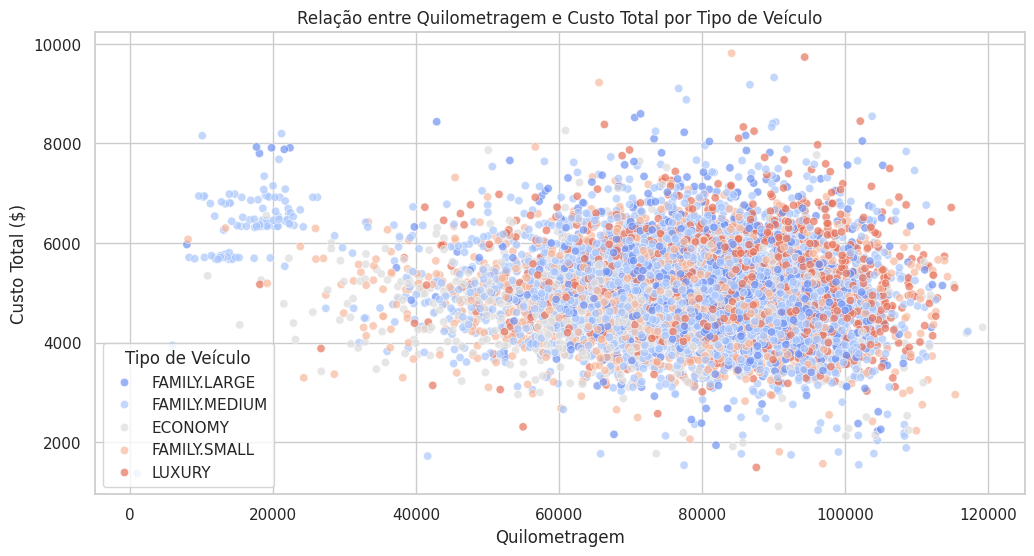

Correlação entre quilometragem e custo total por tipo de veículo:
  Tipo de Veículo  Correlação (mileage vs total.cost)
0         ECONOMY                           -0.167734
1    FAMILY.LARGE                           -0.183703
2   FAMILY.MEDIUM                           -0.256677
3    FAMILY.SMALL                           -0.053493
4          LUXURY                           -0.043447


In [36]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='mileage', y='total.cost', hue='vehicle.type', data=df, palette='coolwarm', alpha=0.7)

plt.title('Relação entre Quilometragem e Custo Total por Tipo de Veículo')
plt.xlabel('Quilometragem')
plt.ylabel('Custo Total ($)')
plt.legend(title='Tipo de Veículo')
plt.show()

correlation_by_type = df.groupby('vehicle.type')[['mileage', 'total.cost']].corr().iloc[0::2, -1].reset_index()
correlation_by_type = correlation_by_type[['vehicle.type', 'total.cost']]
correlation_by_type.columns = ['Tipo de Veículo', 'Correlação (mileage vs total.cost)']

print("Correlação entre quilometragem e custo total por tipo de veículo:")
print(correlation_by_type)
